---
**Table of Contents**
---

1. [**Introduction**]
2. [**Problem Statement**]
3. [**Installing and Importing Libraries**]
4. [**Data Acquisition and Description**]
5. [**EDA**]
6. [**Linear Regression**]
7. [**Decision Tree**]
8. [**Random Forest**]
9. [**GridSearchCV**]
10. [**RandomizedSearchCV**]
11. [**Conclusion**]


1.**Introduction**

The dataset contains weekly retail scan data for National Retail Volume (units) and price.

Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

The column AveragePrice is the average price of a single avocado.

This is the data that have to predict for future samples.

2.**Problem Statement**

- Avacard-corp avocados are sourced from over 1000 growers owning over 65,000 acres across California, Mexico, Chile, and Peru.

- With generations of experience growing, packing, and shipping avocados, they have a deep understanding of the avocado industry.

- Their aim is to source quality fruit that’s sustainably grown and handled in the most efficient, shortest supply route possible.

- They want to increase their supply throughout the United States and need to make sure that they are selling their products at the best possible price.

- Avocado prices have rocketed in recent years by up to 129%, with the average national price in the US of a single Hass avocado reaching $2.10 in 2019, almost doubling in just one year.

- Due to this uncertainty in the prices, the company is not able to sell their produce at the optimal price.

- Task is to predict the optimal price of the avocardo using the previous sales data of avocardo according to different regions.

3.**Importing Libraries**

In [2]:
import pandas as pd
import warnings 
warnings.simplefilter('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

4.**Data Acquisition and Description**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv')
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


|Column Name||	Description|
|Id||	Unique identity of each observation.|
|Date||	The date of the observation.|
|AveragePrice||	The average price of a single avocado.|
|Total Volume||	Total number of avocados sold.|
|4046||	Total number of avocados with PLU 4046 sold.|
|4225||	Total number of avocados with PLU 4225 sold.|
|4770||	Total number of avocados with PLU 4770 sold.|
|Total Bags||	Total number of bags sold.|
|Small Bags||	Total number of small bags sold.|
|Large Bags||	Total number of large bags sold.|
|XLarge Bags||	Total number of extra-large bags sold.|
|type||	Type of an avocado (conventional or organic).|
|year||	The year of observation.|
|Region||	The city or region of the observation.|

5.**EDA & Profiling**

In [4]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- Dataset having total 14 columns in which 3 are categorical and remaining 11 are numerical

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

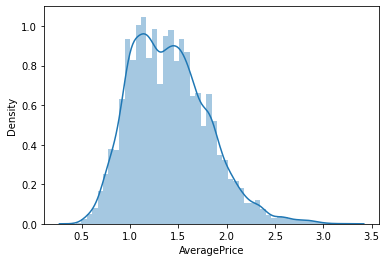

In [6]:
sns.distplot(df.AveragePrice)

- Average Price of Avocado is normally distributed with little right skew, let's see the what are the types along with average price

In [7]:
A = df[['type','AveragePrice']]
B = A.groupby(by='type').mean().sort_values(by='AveragePrice', ascending = True)
B

,AveragePrice
type,
conventional,1.158040
organic,1.653999


Text(0, 0.5, 'Average Price in $')

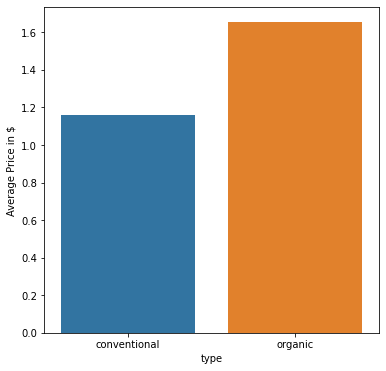

In [8]:
plt.figure(figsize=(6,6))
sns.barplot(x=B.index,y=B['AveragePrice'])
plt.ylabel('Average Price in $')

- Organic Avocados are expensive than conventional

In [9]:
C = df[['year','AveragePrice']]
D = C.groupby(by='year').mean().sort_values(by='AveragePrice',ascending = False)
D

,AveragePrice
year,
2017,1.515128
2015,1.375590
2018,1.347531
2016,1.338640


Text(0, 0.5, 'Average Price in $')

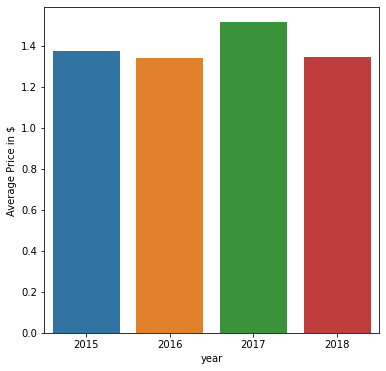

In [10]:
plt.figure(figsize=(6,6))
sns.barplot(x=D.index,y=D['AveragePrice'])
plt.ylabel('Average Price in $')

- There is a spike in price during 2017 and mostly same during 2015, 2017 and 2018

In [11]:
E = df[['region','AveragePrice']]
F = E.groupby(by='region').mean().sort_values(by='AveragePrice',ascending=False)
F

,AveragePrice
region,
HartfordSpringfield,1.818639
SanFrancisco,1.804201
NewYork,1.727574
Philadelphia,1.632130
Sacramento,1.621568
Charlotte,1.606036
Northeast,1.601923
Albany,1.561036
Chicago,1.556775


Text(0.5, 0, 'Average Price in $')

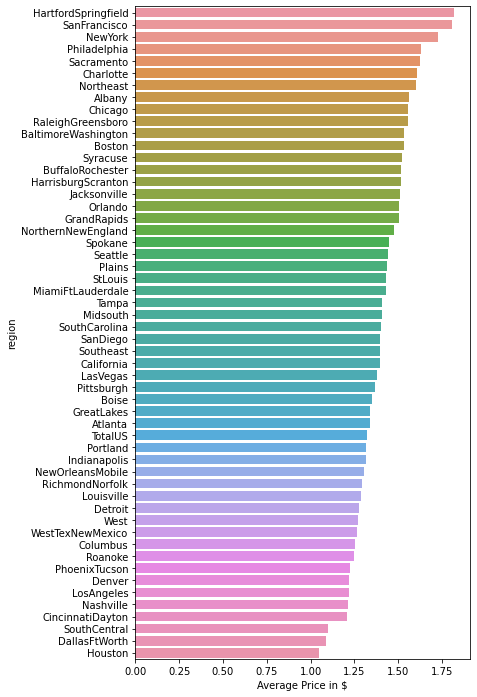

In [12]:
plt.figure(figsize=(6,12))
sns.barplot(y=F.index, x=F['AveragePrice'])
plt.xlabel('Average Price in $')

- Average Price varied at each region! 

In [13]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


<AxesSubplot:>

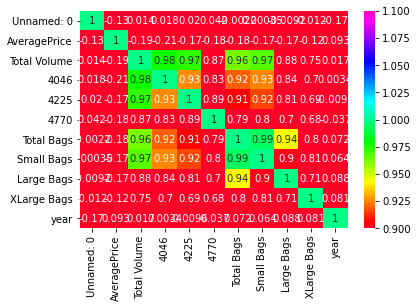

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='gist_rainbow',vmin=1,vmax=1)

- We can observe multicolleaniarity between Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags
- So we are going drop all columns except Total Volume before we proceed further
- Also Unnamed:0 column also containing the ID nos of observations which also can be dropped

In [15]:
data = df.drop(columns = ['Unnamed: 0','Date','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags'])
data.head()

,AveragePrice,Total Volume,type,year,region
0,1.33,64236.62,conventional,2015,Albany
1,1.35,54876.98,conventional,2015,Albany
2,0.93,118220.22,conventional,2015,Albany
3,1.08,78992.15,conventional,2015,Albany
4,1.28,51039.60,conventional,2015,Albany


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   type          18249 non-null  object 
 3   year          18249 non-null  int64  
 4   region        18249 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 713.0+ KB


In [17]:
data.corr()

,AveragePrice,Total Volume,year
AveragePrice,1.000000,-0.192752,0.093197
Total Volume,-0.192752,1.000000,0.017193
year,0.093197,0.017193,1.000000


<AxesSubplot:>

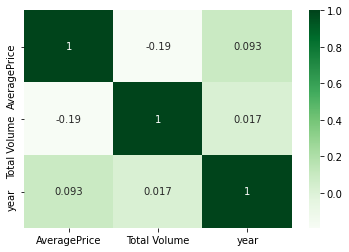

In [18]:
sns.heatmap(data.corr(),annot=True,cmap='Greens')

- Now we can find no coleaniarity between colomns of dataset

In [19]:
numericalfeatures = ['AveragePrice','Total Volume','year']
categoricalfeatures = ['type','region']

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(data[numericalfeatures])
data[numericalfeatures] = ss.transform(data[numericalfeatures])
data.head()

,AveragePrice,Total Volume,type,year,region
0,-0.188689,-0.227716,conventional,-1.221282,Albany
1,-0.139020,-0.230427,conventional,-1.221282,Albany
2,-1.182069,-0.212085,conventional,-1.221282,Albany
3,-0.809551,-0.223444,conventional,-1.221282,Albany
4,-0.312861,-0.231538,conventional,-1.221282,Albany


In [21]:
data = pd.get_dummies(data, columns=categoricalfeatures)
data.head()

,AveragePrice,Total Volume,year,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,-0.188689,-0.227716,-1.221282,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.139020,-0.230427,-1.221282,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.182069,-0.212085,-1.221282,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.809551,-0.223444,-1.221282,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.312861,-0.231538,-1.221282,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
columns = list(data.columns)
columns

['AveragePrice',
 'Total Volume',
 'year',
 'type_conventional',
 'type_organic',
 'region_Albany',
 'region_Atlanta',
 'region_BaltimoreWashington',
 'region_Boise',
 'region_Boston',
 'region_BuffaloRochester',
 'region_California',
 'region_Charlotte',
 'region_Chicago',
 'region_CincinnatiDayton',
 'region_Columbus',
 'region_DallasFtWorth',
 'region_Denver',
 'region_Detroit',
 'region_GrandRapids',
 'region_GreatLakes',
 'region_HarrisburgScranton',
 'region_HartfordSpringfield',
 'region_Houston',
 'region_Indianapolis',
 'region_Jacksonville',
 'region_LasVegas',
 'region_LosAngeles',
 'region_Louisville',
 'region_MiamiFtLauderdale',
 'region_Midsouth',
 'region_Nashville',
 'region_NewOrleansMobile',
 'region_NewYork',
 'region_Northeast',
 'region_NorthernNewEngland',
 'region_Orlando',
 'region_Philadelphia',
 'region_PhoenixTucson',
 'region_Pittsburgh',
 'region_Plains',
 'region_Portland',
 'region_RaleighGreensboro',
 'region_RichmondNorfolk',
 'region_Roanoke',
 'regio

In [23]:
xlabes = ['Total Volume',
 'year',
 'type_conventional',
 'type_organic',
 'region_Albany',
 'region_Atlanta',
 'region_BaltimoreWashington',
 'region_Boise',
 'region_Boston',
 'region_BuffaloRochester',
 'region_California',
 'region_Charlotte',
 'region_Chicago',
 'region_CincinnatiDayton',
 'region_Columbus',
 'region_DallasFtWorth',
 'region_Denver',
 'region_Detroit',
 'region_GrandRapids',
 'region_GreatLakes',
 'region_HarrisburgScranton',
 'region_HartfordSpringfield',
 'region_Houston',
 'region_Indianapolis',
 'region_Jacksonville',
 'region_LasVegas',
 'region_LosAngeles',
 'region_Louisville',
 'region_MiamiFtLauderdale',
 'region_Midsouth',
 'region_Nashville',
 'region_NewOrleansMobile',
 'region_NewYork',
 'region_Northeast',
 'region_NorthernNewEngland',
 'region_Orlando',
 'region_Philadelphia',
 'region_PhoenixTucson',
 'region_Pittsburgh',
 'region_Plains',
 'region_Portland',
 'region_RaleighGreensboro',
 'region_RichmondNorfolk',
 'region_Roanoke',
 'region_Sacramento',
 'region_SanDiego',
 'region_SanFrancisco',
 'region_Seattle',
 'region_SouthCarolina',
 'region_SouthCentral',
 'region_Southeast',
 'region_Spokane',
 'region_StLouis',
 'region_Syracuse',
 'region_Tampa',
 'region_TotalUS',
 'region_West',
 'region_WestTexNewMexico']

In [24]:
len(xlabes)

58

In [25]:
X=data[xlabes]
X.head()

,Total Volume,year,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,-0.227716,-1.221282,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.230427,-1.221282,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.212085,-1.221282,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.223444,-1.221282,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.231538,-1.221282,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y=data['AveragePrice']
y.head()

0   -0.188689
1   -0.139020
2   -1.182069
3   -0.809551
4   -0.312861
Name: AveragePrice, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
def split(X,y):
    return train_test_split(X,y,test_size=.2,random_state=1)
X_train, X_test, y_train, y_test = split(X,y)

In [28]:
print('Shape of X_train is : ',X_train.shape)
print('Shape of y_train is : ',y_train.shape)

Shape of X_train is :  (14599, 58)
Shape of y_train is :  (14599,)


In [29]:
print('Shape of X_test is : ',X_test.shape)
print('Shape of y_test is : ',y_test.shape)

Shape of X_test is :  (3650, 58)
Shape of y_test is :  (3650,)


6.**Linear Regression**

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(model)

LinearRegression()


In [31]:
predlables_ytest_lg = model.predict(X_test)
predlables_ytrain_lg = model.predict(X_train)

In [32]:
from sklearn import metrics
import numpy as np
RMSE_lg_train = np.sqrt(metrics.mean_squared_error(y_train,predlables_ytrain_lg))
print('RMSE for LR train data is :',RMSE_lg_train)

RMSE for LR train data is : 0.6681169717381915


In [33]:
RMSE_lg_test = np.sqrt(metrics.mean_squared_error(y_test,predlables_ytest_lg))
print('RMSE for LR test data is :',RMSE_lg_test)

RMSE for LR test data is : 0.6591661615881169


In [34]:
from sklearn.metrics import r2_score
R2_lg_train = r2_score(y_train,predlables_ytrain_lg)
print('R-Square Error for LR train data is :',R2_lg_train)

R-Square Error for LR train data is : 0.5534227470603612


In [35]:
R2_lg_test = r2_score(y_test,predlables_ytest_lg)
print('R-Square Error for LR test data is :',R2_lg_test)

R-Square Error for LR test data is : 0.56626117570013


In [36]:
def Adjusted_r2(r_square,N):
    return(1-(((1-r_square)*(N-1))/(N-58-1)))

In [37]:
adj_r2_lg_train = Adjusted_r2(R2_lg_train,len(X_train))
print('The Adjusted R-square Error for LR train data is :',adj_r2_lg_train)

The Adjusted R-square Error for LR train data is : 0.5516413522412073


In [38]:
adj_r2_lg_test = Adjusted_r2(R2_lg_test,len(X_test))
print('The Adjusted R-square Error for LR test data is :',adj_r2_lg_test)

The Adjusted R-square Error for LR test data is : 0.5592556474881021


7.**Decision Tree**

In [39]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
model1.fit(X_train,y_train)
print(model1)

DecisionTreeRegressor()


In [40]:
predlables_ytest_dt = model1.predict(X_test)
predlables_ytrain_dt = model1.predict(X_train)

In [41]:
RMSE_dt_train = np.sqrt(metrics.mean_squared_error(y_train,predlables_ytrain_dt))
print('RMSE for DT train data is :',RMSE_dt_train)

RMSE for DT train data is : 0.014614234021850584


In [42]:
RMSE_dt_test = np.sqrt(metrics.mean_squared_error(y_test,predlables_ytest_dt))
print('RMSE for DT test data is :',RMSE_dt_test)

RMSE for DT test data is : 0.5839738524670635


In [43]:
R2_dt_train = r2_score(y_train,predlables_ytrain_dt)
print('R-Square Error for DT train data is :',R2_dt_train)

R-Square Error for DT train data is : 0.9997863299237543


In [44]:
R2_dt_test = r2_score(y_test,predlables_ytest_dt)
print('R-Square Error for DT test data is :',R2_dt_test)

R-Square Error for DT test data is : 0.6595719850293574


In [45]:
adj_r2_dt_train = Adjusted_r2(R2_dt_train,len(X_train))
print('The Adjusted R-square Error for DT train data is :',adj_r2_dt_train)

The Adjusted R-square Error for DT train data is : 0.9997854775947018


In [46]:
adj_r2_dt_test = Adjusted_r2(R2_dt_test,len(X_test))
print('The Adjusted R-square Error for DT test data is :',adj_r2_dt_test)

The Adjusted R-square Error for DT test data is : 0.6540735654057714


8.**Random Forest**

In [47]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(X_train,y_train)
print(model2)

RandomForestRegressor()


In [48]:
predlables_ytest_rf = model2.predict(X_test)
predlables_ytrain_rf = model2.predict(X_train)

In [49]:
RMSE_rf_train = np.sqrt(metrics.mean_squared_error(y_train,predlables_ytrain_rf))
print('RMSE for RF train data is :',RMSE_rf_train)

RMSE for RF train data is : 0.1741482477635338


In [50]:
RMSE_rf_test = np.sqrt(metrics.mean_squared_error(y_test,predlables_ytest_rf))
print('RMSE for RF test data is :',RMSE_rf_test)

RMSE for RF test data is : 0.47910913620748335


In [51]:
R2_rf_train = r2_score(y_train,predlables_ytrain_rf)
print('R-Square Error for RF train data is :',R2_rf_train)

R-Square Error for RF train data is : 0.9696590057615084


In [52]:
R2_rf_test = r2_score(y_test,predlables_ytest_rf)
print('R-Square Error for RF test data is :',R2_rf_test)

R-Square Error for RF test data is : 0.770856578422439


In [53]:
adj_r2_rf_train = Adjusted_r2(R2_rf_train,len(X_train))
print('The Adjusted R-square Error for RF train data is :',adj_r2_rf_train)

The Adjusted R-square Error for RF train data is : 0.9695379756606947


In [54]:
adj_r2_rf_test = Adjusted_r2(R2_rf_test,len(X_test))
print('The Adjusted R-square Error for RF test data is :',adj_r2_rf_test)

The Adjusted R-square Error for RF test data is : 0.7671555707779114


9.**GridSearchCV**

In [55]:
from sklearn.model_selection import GridSearchCV

grid_search = DecisionTreeRegressor()

treepara = [{'max_depth': range(2,60), 'max_features': ['sqrt', 'log2', None] }]

grid_search_dt = GridSearchCV(grid_search, treepara, cv=10, refit='AUC')
grid_search_dt.fit(X_train,y_train)
print(grid_search_dt)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}],
             refit='AUC')


In [56]:
model4 = grid_search_dt.best_estimator_

In [57]:
predlables_ytest_gdt = model4.predict(X_test)
predlables_ytrain_gdt = model4.predict(X_train)

In [58]:
RMSE_gdt_train = np.sqrt(metrics.mean_squared_error(y_train,predlables_ytrain_gdt))
print('RMSE for GDT train data is :',RMSE_gdt_train)

RMSE for GDT train data is : 0.24326090954786286


In [59]:
RMSE_gdt_test = np.sqrt(metrics.mean_squared_error(y_test,predlables_ytest_gdt))
print('RMSE for GDT test data is :',RMSE_gdt_test)

RMSE for GDT test data is : 0.5590381076166949


In [60]:
R2_gdt_train = r2_score(y_train,predlables_ytrain_gdt)
print('R-Square Error for GDT train data is :',R2_gdt_train)

R-Square Error for GDT train data is : 0.9407980185713083


In [61]:
R2_gdt_test = r2_score(y_test,predlables_ytest_gdt)
print('R-Square Error for GDT test data is :',R2_gdt_test)

R-Square Error for GDT test data is : 0.6880239069862715


In [62]:
adj_r2_gdt_train = Adjusted_r2(R2_gdt_train,len(X_train))
print('The Adjusted R-square Error for GDT train data is :',adj_r2_gdt_train)

The Adjusted R-square Error for GDT train data is : 0.940561862111689


In [63]:
adj_r2_gdt_test = Adjusted_r2(R2_gdt_test,len(X_test))
print('The Adjusted R-square Error for GDT test data is :',adj_r2_gdt_test)

The Adjusted R-square Error for GDT test data is : 0.6829850282909787


10.**RandomizedSearchCV**

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

pararand = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              'max_features': ['sqrt', 'log2', None]
             }

n_iter_search = 50
random_search = RandomizedSearchCV(model2,param_distributions=pararand,n_iter=n_iter_search,n_jobs=-1)

In [65]:
model5 = random_search.fit(X_train,y_train)

In [66]:
predlables_ytest_rrf = model5.predict(X_test)
predlables_ytrain_rrf = model5.predict(X_train)

In [67]:
RMSE_rrf_train = np.sqrt(metrics.mean_squared_error(y_train,predlables_ytrain_rrf))
print('RMSE for RRF train data is :',RMSE_rrf_train)

RMSE for RRF train data is : 0.7091515923099773


In [68]:
RMSE_rrf_test = np.sqrt(metrics.mean_squared_error(y_test,predlables_ytest_rrf))
print('RMSE for RRF test data is :',RMSE_rrf_test)

RMSE for RRF test data is : 0.707231284295654


In [69]:
R2_rrf_train = r2_score(y_train,predlables_ytrain_rrf)
print('R-Square Error for RRF train data is :',R2_rrf_train)

R-Square Error for RRF train data is : 0.496882116596021


In [70]:
R2_rrf_test = r2_score(y_test,predlables_ytest_rrf)
print('R-Square Error for RRF test data is :',R2_rrf_test)

R-Square Error for RRF test data is : 0.5007001732442358


In [71]:
adj_r2_rrf_train = Adjusted_r2(R2_rrf_train,len(X_train))
print('The Adjusted R-square Error for RRF train data is :',adj_r2_rrf_train)

The Adjusted R-square Error for RRF train data is : 0.4948751814352623


In [72]:
adj_r2_rrf_test = Adjusted_r2(R2_rrf_test,len(X_test))
print('The Adjusted R-square Error for RRF test data is :',adj_r2_rrf_test)

The Adjusted R-square Error for RRF test data is : 0.49263573716742304


In [79]:
summary = pd.read_csv('D:\GCDAI\ML1\Project\details.csv')
summary

,Model,RMSE,R-Square,Adjusted R-square
0,Linear Regression,0.659166,0.566261,0.559256
1,Decision Tree,0.581627,0.662303,0.656849
2,Random Forest,0.476693,0.773162,0.769498
3,GridSearchCV,0.554303,0.693287,0.688333
4,RandomizedSearchCV,0.707377,0.500495,0.492427


11.**Conclusion**

- After reviewing Linear Regression, Decision Tree, Random Forest, GridSearchCV and RandomizedSearchCV best prediction model for this data is Random Forest.